# P03_04_Univar_ML

In [1]:
section_fig_main_title = 'P03_04_Univar_ML_'

In [2]:
import os, sys
import requests
from urllib.parse import urljoin, urlparse
from bs4 import BeautifulSoup as bs
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
from pandas.plotting import lag_plot

In [3]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

In [4]:
from sklearn.metrics import r2_score,mean_absolute_error
# !/Users/amin/anaconda3/bin/python -m pip install xgboost

In [5]:
# !/Users/amin/anaconda3/bin/python -m pip install --upgrade tensorflow 
# pip install --upgrade tensorflow 

In [6]:

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
# from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD

import math
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [9]:
# !/Users/amin/anaconda3/bin/python -m pip install pmdarima
# !/Users/amin/anaconda3/bin/python -m pip install statsmodels

In [10]:
# !/Users/amin/anaconda3/bin/python -m pip install tensorflow[-gpu]==1.14
# pip install tensorflow[-gpu]==1.14

In [11]:
from pandas.plotting import autocorrelation_plot
import gif

In [12]:
# !pip install statsmodels --upgrade
# !/Users/amin/anaconda3/bin/python -m pip install statsmodels --upgrade

In [13]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

In [14]:
import tensorflow as tf
tf.__version__


'1.13.1'

In [15]:

import tensorflow as tf
from tensorflow import keras

import gif
from tqdm import tqdm



In [16]:
from sklearn import metrics
import statsmodels.api as sm

## Read Data 

Using the univariate evenly spaced time series data from P03_01.

In [17]:
csv_path = "../Data/Data_ICME_speed_transformed_18D_P03_01"
df = pd.read_pickle(csv_path)

In [18]:
df.head()

ICME Plasma/Field Start Y/M/D (UT) (b)
1996-06-14    370.0
1996-07-02    360.0
1996-07-20    360.0
1996-08-07    360.0
1996-08-25    350.0
Freq: 18D, Name: V_ICME (km/s) (i), dtype: float64

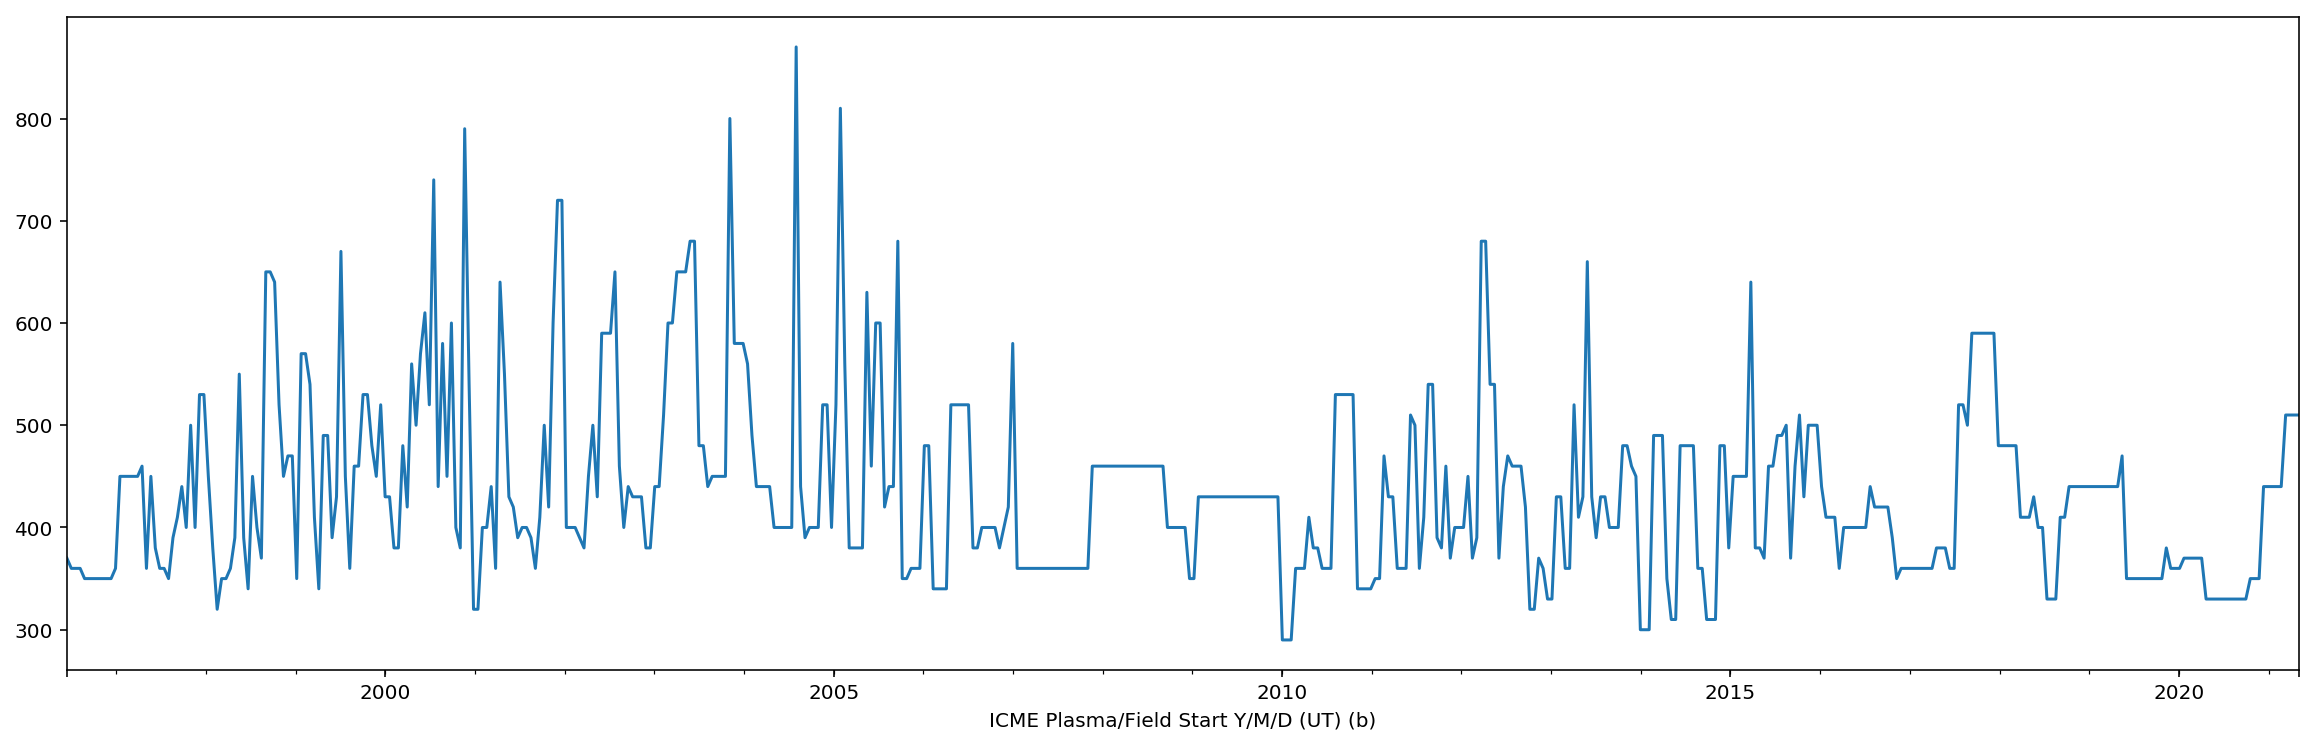

In [19]:
df.plot(figsize=(20,6))

## Preparing data

Here I make new data set using pandas library. The shift method is used along with 60 lags. The goal is to use 60 lags (timestamps) to forecast the future timestamps (18 days ahead).


In [20]:
lag = 60

In [21]:
df_pd = pd.DataFrame(df)
df_pd_shifted = pd.DataFrame(df)

for i in range(1,lag+1):
    colname = 'lag' + str(i) 
    df_pd_shifted[colname] = df_pd.shift(periods=i)
    
#     df_pd_shifted[colname].astype('int32').dtypes

# discard the first NaN rows 
df_pd_shifted = df_pd_shifted[lag:]


for i in range(1,lag+1):
    colname = 'lag' + str(i) 
#     df_pd_shifted[colname] = df_pd.shift(periods=i)
    
    df_pd_shifted[colname].astype('int32').dtypes

In [22]:
df_pd_shifted.head()

,V_ICME (km/s) (i),lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,...,lag51,lag52,lag53,lag54,lag55,lag56,lag57,lag58,lag59,lag60
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,,,,,,,,,,,,,,
1999-05-30,390.0,490.0,490.0,340.0,410.0,540.0,570.0,570.0,350.0,470.0,...,350.0,350.0,350.0,350.0,350.0,350.0,360.0,360.0,360.0,370.0
1999-06-17,430.0,390.0,490.0,490.0,340.0,410.0,540.0,570.0,570.0,350.0,...,350.0,350.0,350.0,350.0,350.0,350.0,350.0,360.0,360.0,360.0
1999-07-05,670.0,430.0,390.0,490.0,490.0,340.0,410.0,540.0,570.0,570.0,...,360.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,360.0,360.0
1999-07-23,450.0,670.0,430.0,390.0,490.0,490.0,340.0,410.0,540.0,570.0,...,450.0,360.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,360.0
1999-08-10,360.0,450.0,670.0,430.0,390.0,490.0,490.0,340.0,410.0,540.0,...,450.0,450.0,360.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0


## Save data

In [23]:
df_pd_shifted.to_pickle('../Data/Data_univar_ICME_lag60tsp_supervise_P03_04')

In [24]:
# df_corr = df_pd_shifted.corr().abs()
# df_corr

In [25]:
# df_corr = df_pd_shifted.corr()
# plt.figure(figsize=(18,8))

# sns.heatmap(df_corr, 
#             #xticklabels=df_corr.columns,
#             yticklabels=df_corr.columns,
#             cmap='vlag',
#             #annot=True,
#             #linewidth=0.5, center=0,
#             #vmin=-0.2, vmax=0.3
#            )
# plt.savefig("../Figures/" + section_fig_main_title +"xgboost_corr1.png")

In [26]:
# df_corr = df_pd_shifted.corr().abs()
# plt.figure(figsize=(4,20))
# sns.heatmap(df_corr[['V_ICME (km/s) (i)']].sort_values(by=['V_ICME (km/s) (i)'],ascending=False),
#             vmin=0,
#             cmap='Blues',
#             annot=True);
# plt.savefig("../Figures/" + section_fig_main_title +"xgboost_corr2.png")
# plt.show()

In [27]:
# df_pd_shifted.dtypes

## Train and Test split

lag60 means ICME speed at 60*18 days back.

The target is V_ICME in above dataframe.

In [28]:
split_frac= 0.69
num_train_rows = int(split_frac*len(df_pd_shifted))
num_test_rows = len(df_pd_shifted) - num_train_rows

In [29]:
num_train_rows

307

In [30]:
num_test_rows

139

In [31]:
train, test = df_pd_shifted[0:num_train_rows] , df_pd_shifted[num_train_rows:]

In [32]:
train.head(2)

,V_ICME (km/s) (i),lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,...,lag51,lag52,lag53,lag54,lag55,lag56,lag57,lag58,lag59,lag60
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,,,,,,,,,,,,,,
1999-05-30,390.0,490.0,490.0,340.0,410.0,540.0,570.0,570.0,350.0,470.0,...,350.0,350.0,350.0,350.0,350.0,350.0,360.0,360.0,360.0,370.0
1999-06-17,430.0,390.0,490.0,490.0,340.0,410.0,540.0,570.0,570.0,350.0,...,350.0,350.0,350.0,350.0,350.0,350.0,350.0,360.0,360.0,360.0


## TrainX, TrainY, TestX & TestY

In [33]:
trainX, trainy = train[train.drop(['V_ICME (km/s) (i)'], axis=1).columns], train['V_ICME (km/s) (i)']
testX, testy = test[test.drop(['V_ICME (km/s) (i)'], axis=1).columns], test['V_ICME (km/s) (i)']

## Fit the XGBoost

In [34]:
# fit model
model = XGBRegressor(n_estimators=7)
model.fit(trainX, trainy)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
       gamma=0, gpu_id=-1, importance_type=None,
       interaction_constraints='', learning_rate=0.300000012,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
       monotone_constraints='()', n_estimators=7, n_jobs=8,
       num_parallel_tree=1, objective='reg:squarederror', predictor='auto',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       subsample=1, tree_method='exact', validate_parameters=1,
       verbosity=None)

## Predcit the XGBoost on train

(200, 899.6299468994141)

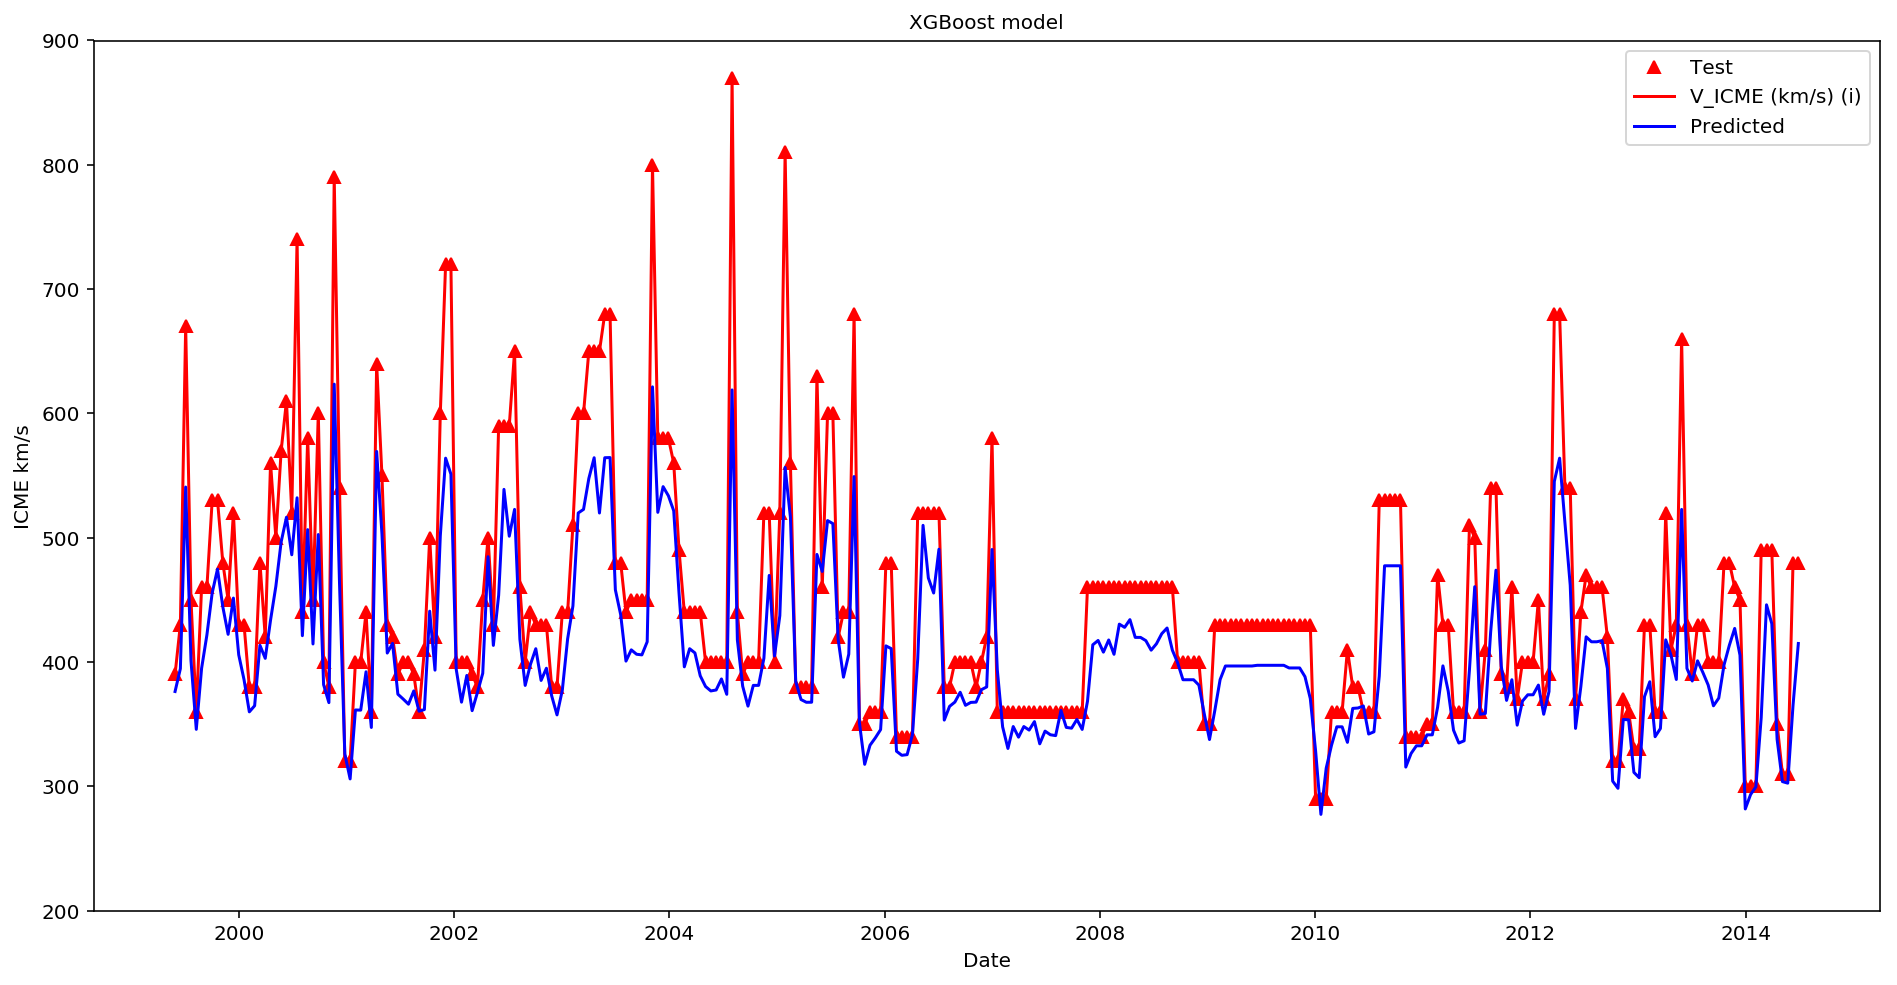

In [35]:
yhat = model.predict(trainX)

# get the index
yhat = pd.Series(yhat)
yhat.index = trainy.index



plt.figure(figsize=(16,8))

# plt.plot(df[(347-past):348], 'r',label='history')
# plt.vlines(df[347:348].index,0, 700, colors='k', linestyles='dashed')

plt.plot(trainy, 'r^',label='Test')
plt.plot(trainy, 'r')
#     test.plot(kind='scatter')

plt.plot(yhat, color='blue',label='Predicted')
plt.title('XGBoost model', fontsize=10)
plt.xlabel('Date', fontsize=10)
plt.ylabel('ICME km/s', fontsize=10)

plt.xticks(fontsize=10), plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.ylim(200,)

### r2_score

In [36]:
real_values = trainy
predited_values = yhat

coefficient_of_dermination = r2_score(real_values, predited_values)
coefficient_of_dermination

rs2 = round(coefficient_of_dermination,2)
print(rs2)

0.63


## MAE

In [37]:
mae = mean_absolute_error(real_values, predited_values)
mae = round(mae, 2)

In [38]:
def plott_real_data(real_values, predited_values, model_name, lable,rs2, mae):
    
    plt.figure(figsize=(8,8))

#     real_values = trainy
#     predited_values = yhat


    plt.scatter(real_values, predited_values, color='b', 
                alpha=0.4, label=f'{lable} | Data with R2 = {rs2}, MAE {mae}',s=100)
    plt.xlabel("ICME km/s Real", fontsize=14)
    plt.ylabel("ICME km/s Predited", fontsize=14)
    plt.xticks(fontsize=12), plt.yticks(fontsize=12)
    plt.plot([0, 650], [0, 650], 'ko--', linewidth=2)
    # plt.hlines(0, -4, 4, linestyles="--", color ='k')
    # plt.vlines(0, -4, 4, linestyles="--", color ='k')

    plt.xlim(300,), plt.ylim(300,)

    plt.title(f"{model_name} model ICME km/s forcast results for 18 days ahead", fontsize=14)

    # plt.tight_layout()
    plt.legend(fontsize=14)

    # plt.savefig("../Figures/" + section_fig_main_title + "XGBoost18daysAhead.png")

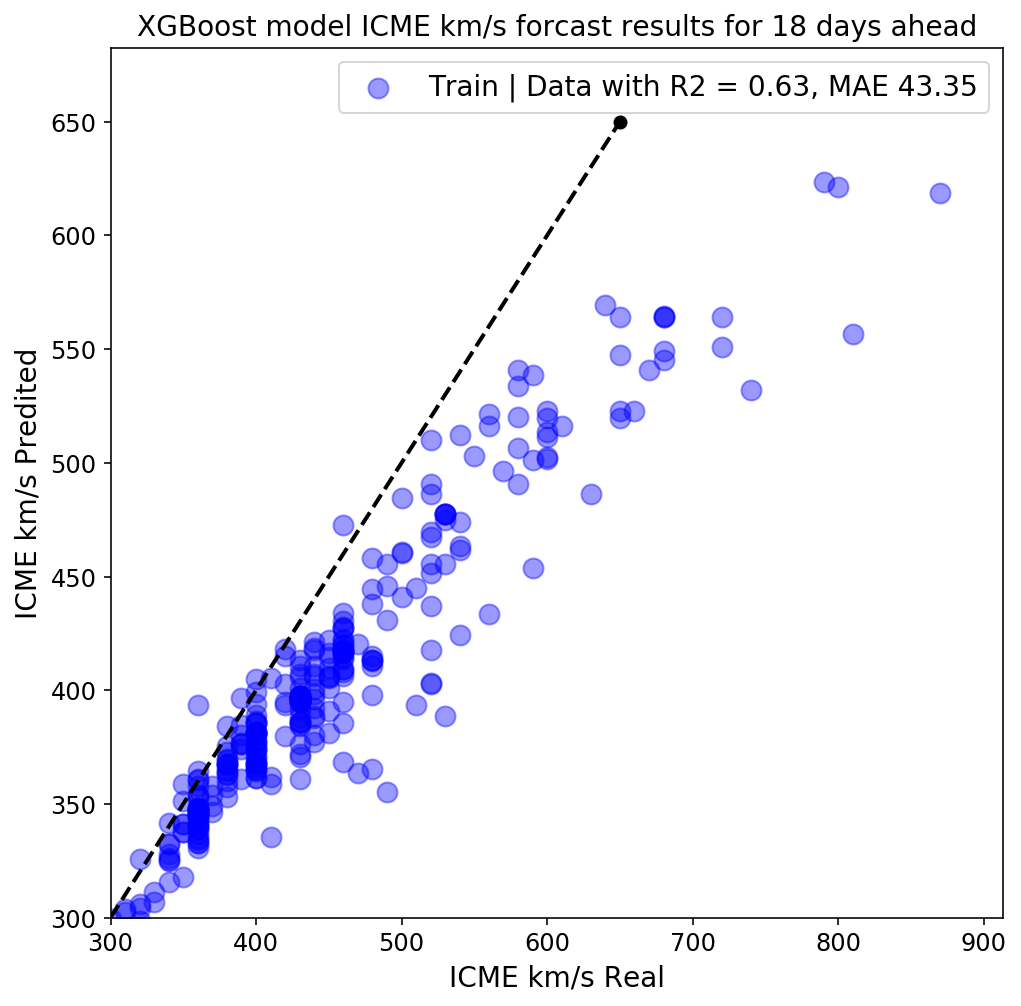

In [39]:
real_values = trainy
predited_values = yhat
lable = 'Train'
model_name = 'XGBoost'
plott_real_data(real_values, predited_values, model_name, lable, rs2, mae)

## Predcit the XGBoost on test

In [40]:
# make a one-step prediction
yhat = model.predict(testX)

In [41]:
# get the index
yhat = pd.Series(yhat)
yhat.index = testy.index


(200, 656.9362686157226)

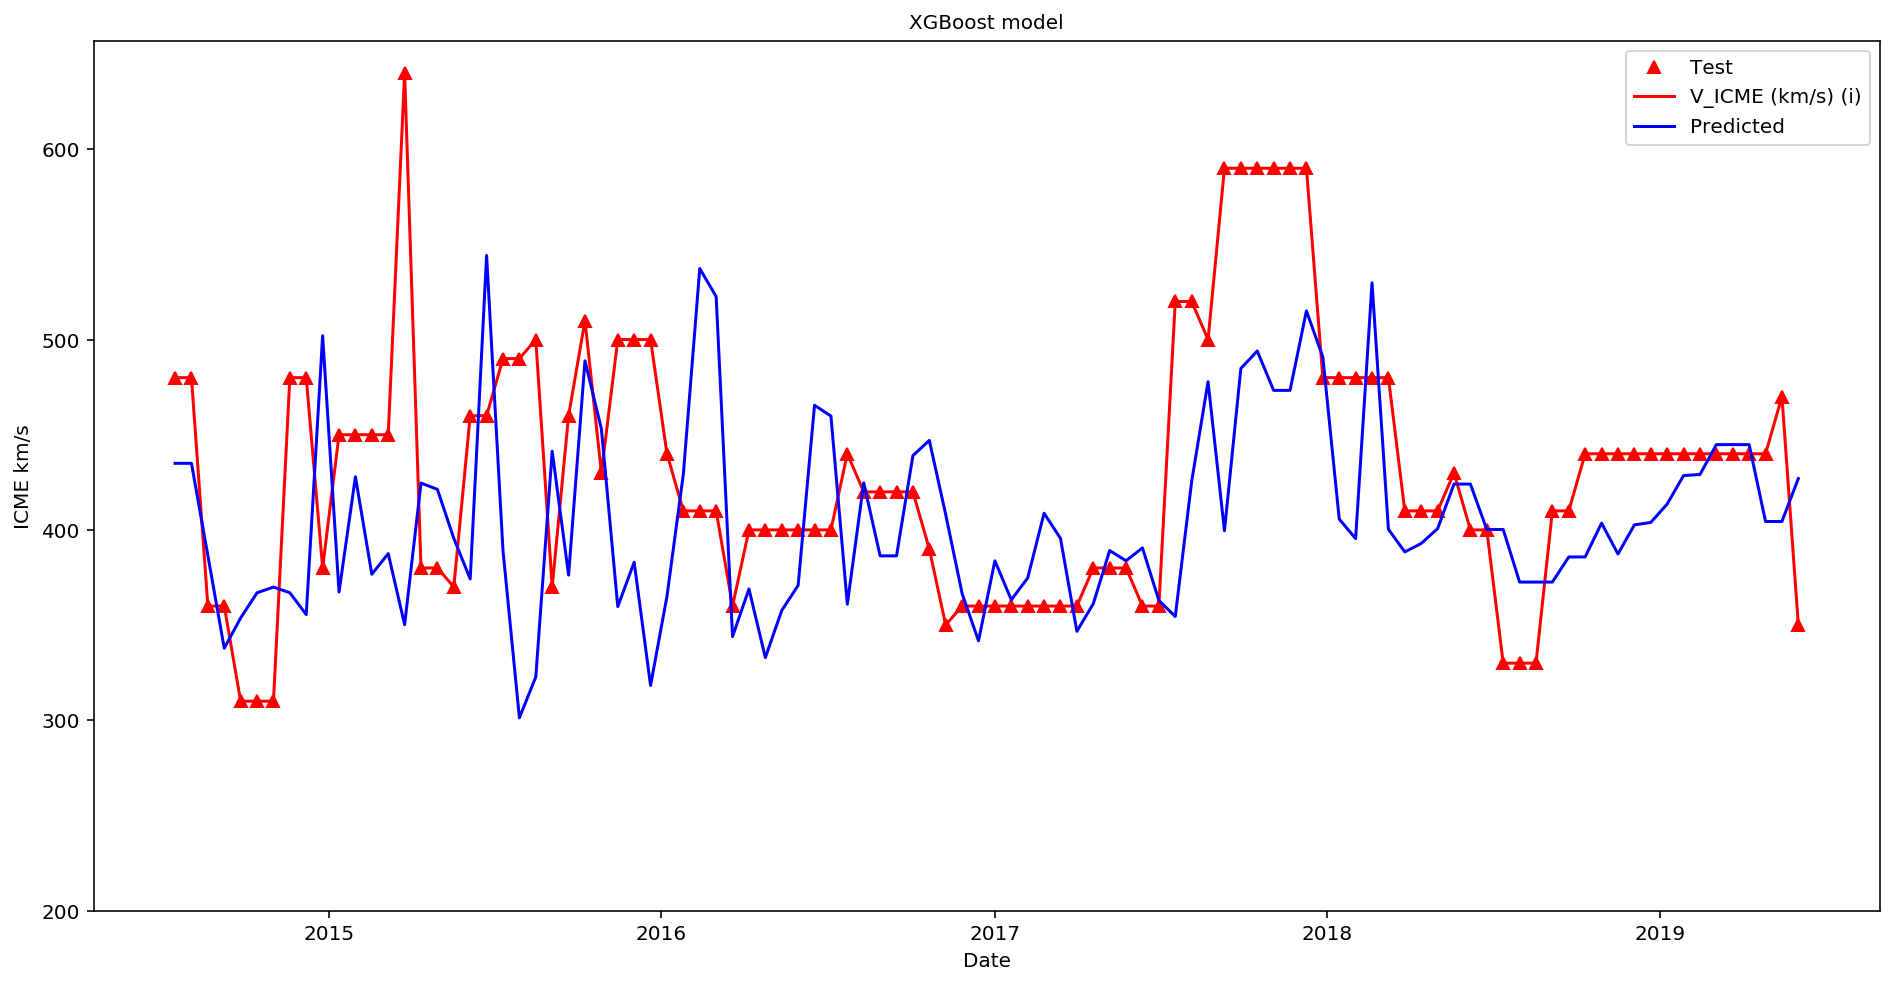

In [42]:
ahead = 100
past = 10

plt.figure(figsize=(16,8))

# plt.plot(df[(347-past):348], 'r',label='history')
# plt.vlines(df[347:348].index,0, 700, colors='k', linestyles='dashed')

plt.plot(testy[0:ahead], 'r^',label='Test')
plt.plot(testy[0:ahead], 'r')
#     test.plot(kind='scatter')

plt.plot(yhat[0:ahead], color='blue',label='Predicted')
plt.title('XGBoost model', fontsize=10)
plt.xlabel('Date', fontsize=10)
plt.ylabel('ICME km/s', fontsize=10)

plt.xticks(fontsize=10), plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.ylim(200,)

### r2_score

In [43]:
real_values = testy
predited_values = yhat

coefficient_of_dermination = r2_score(real_values, predited_values)
coefficient_of_dermination

rs2 = round(coefficient_of_dermination,2)
print(rs2)

-0.02


In [44]:
mae = mean_absolute_error(real_values, predited_values)
mae = round(mae, 2)

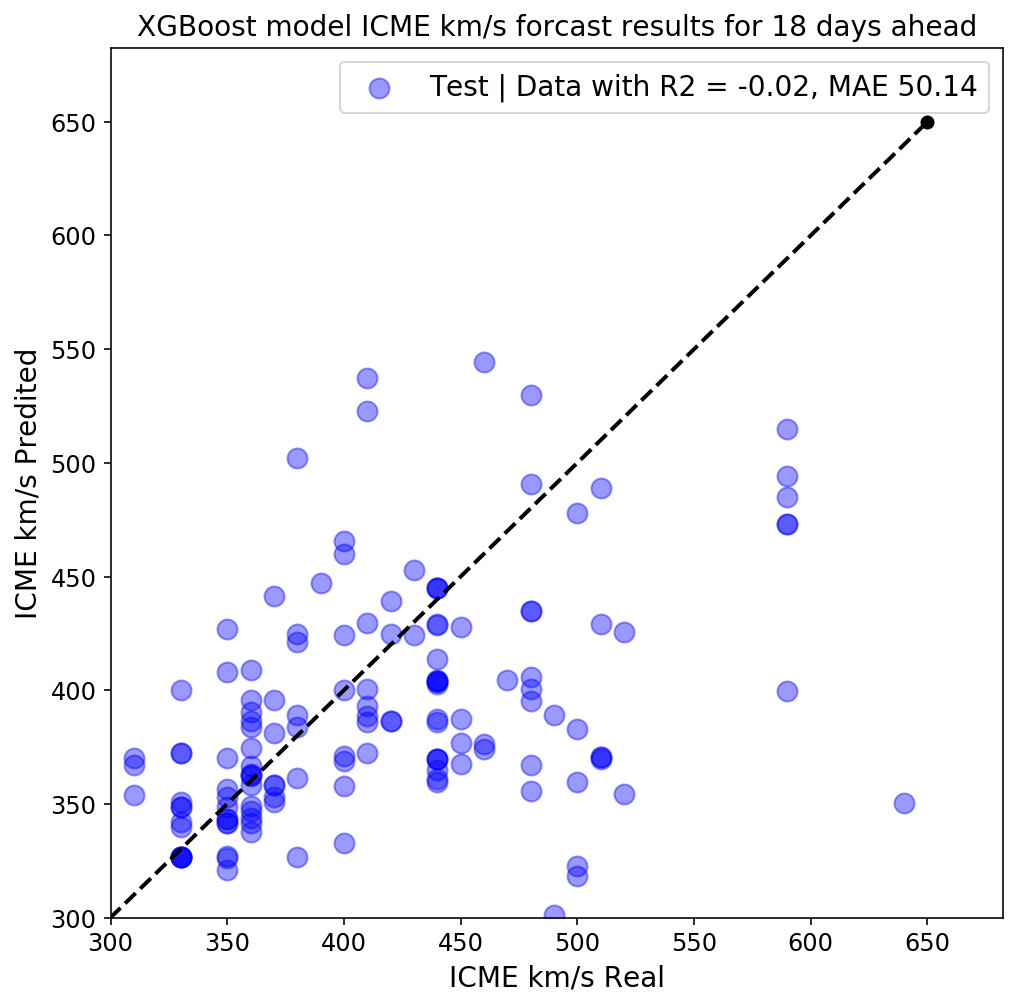

In [45]:
real_values = testy
predited_values = yhat
lable = 'Test'
model_name = 'XGBoost'
plott_real_data(real_values, predited_values, model_name, lable, rs2, mae)

overfitting is observed

### Plot

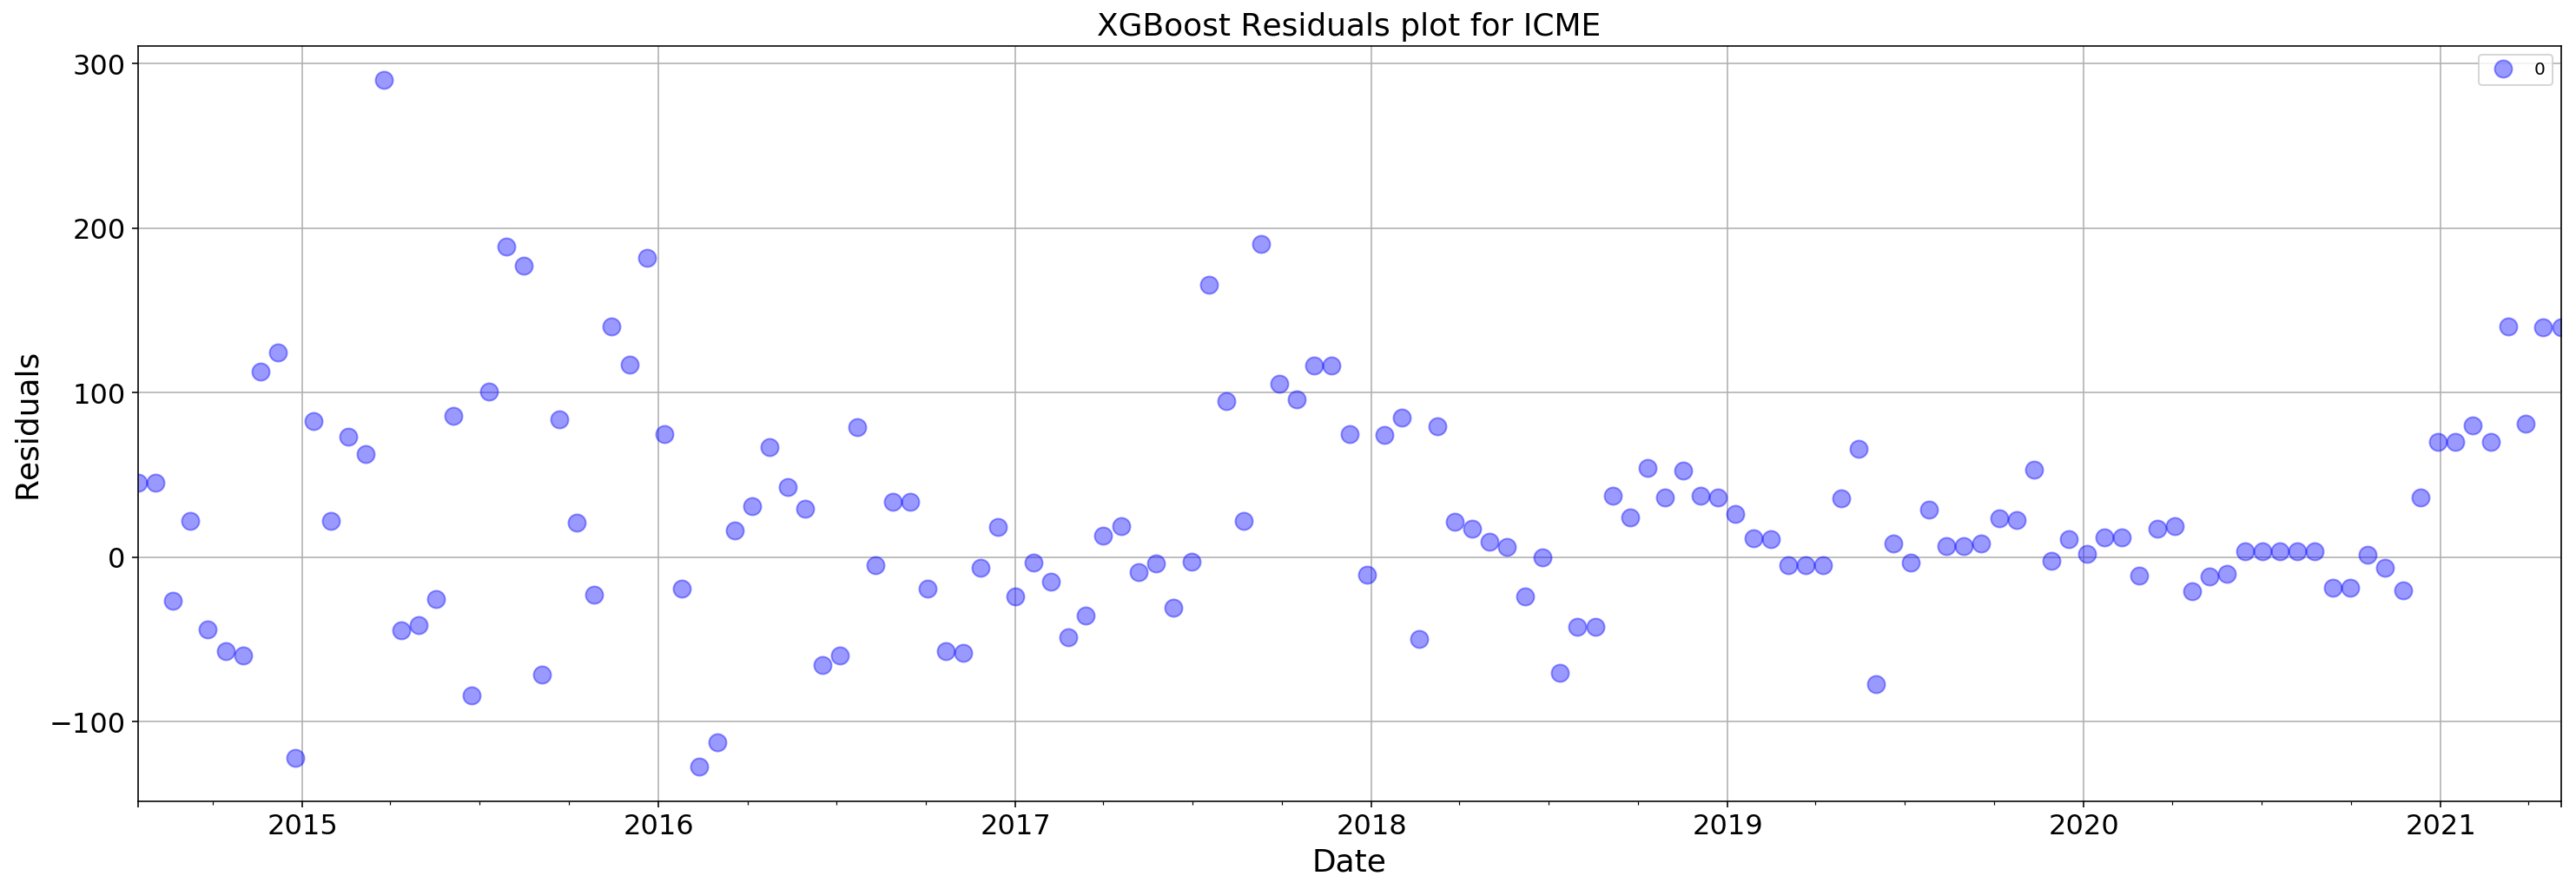

In [46]:
residuals = np.array(real_values) - np.array(predited_values)

residuals = pd.DataFrame(residuals)
residuals.index = testy.index
residuals.plot(kind='line', style='.',
                    figsize=(25,8), 
                    grid=True, 
                    ylabel="ICME km/s",
                    c='b', markersize=20, alpha=0.4)

# plt.hlines(0, 0, 1500, linestyles="--", color ='k')
# plt.xlim(0,)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Residuals", fontsize=18)
plt.title('XGBoost Residuals plot for ICME', fontsize=18)
plt.xticks(fontsize=16), plt.yticks(fontsize=16)
plt.savefig("../Figures/" + section_fig_main_title + "XGBoost18daysAhead_residu.png")

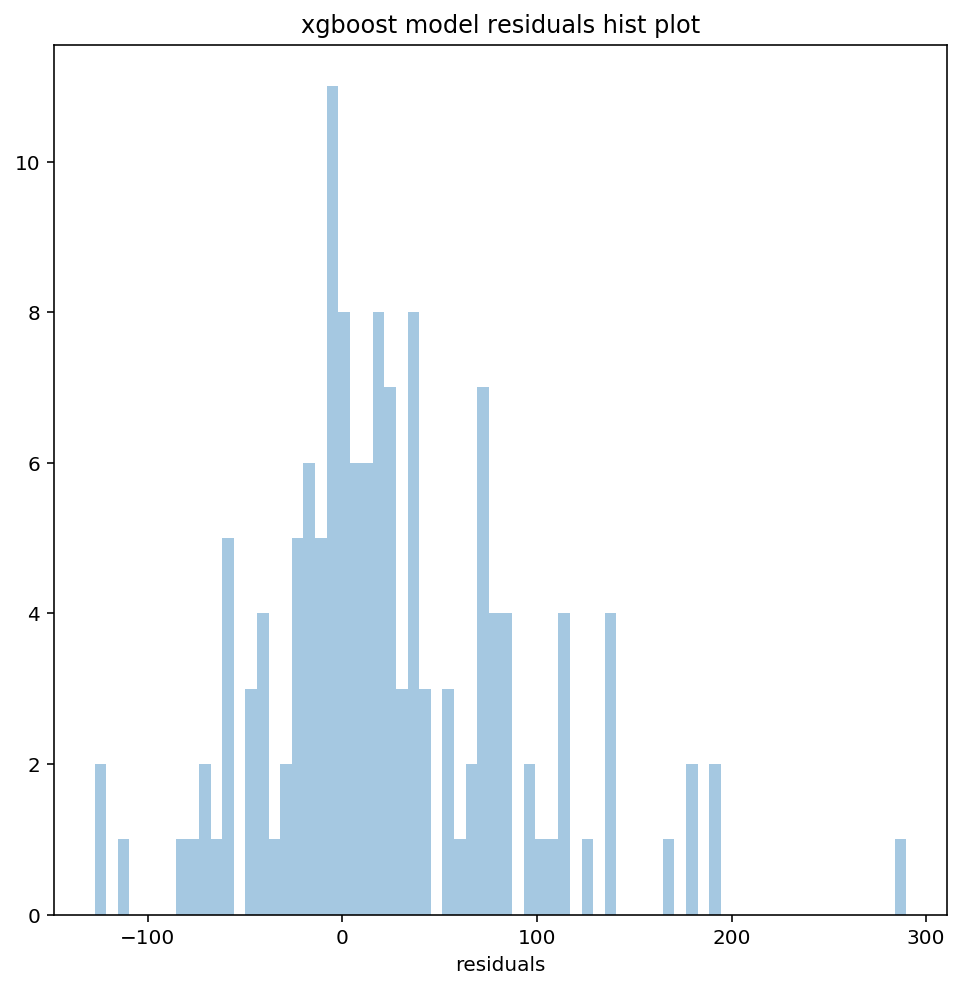

In [47]:
y = testy
y_pred = yhat
# Creat residuals
resids = y - y_pred
# N assumption:
plt.figure(figsize=(8,8))

plt.hist(resids, bins=70, alpha=0.4);
plt.xlabel("residuals")
# plt.ylabel("count")
plt.title("xgboost model residuals hist plot")
plt.savefig("../Figures/" + section_fig_main_title +"xgboost_residu_hist.png")

## Lr model

In [48]:
lr = LinearRegression()
X = trainX
y = trainy
lr.fit(X, y)
y_pred_train = lr.predict(X)

## Predict LR on train

(200, 899.0)

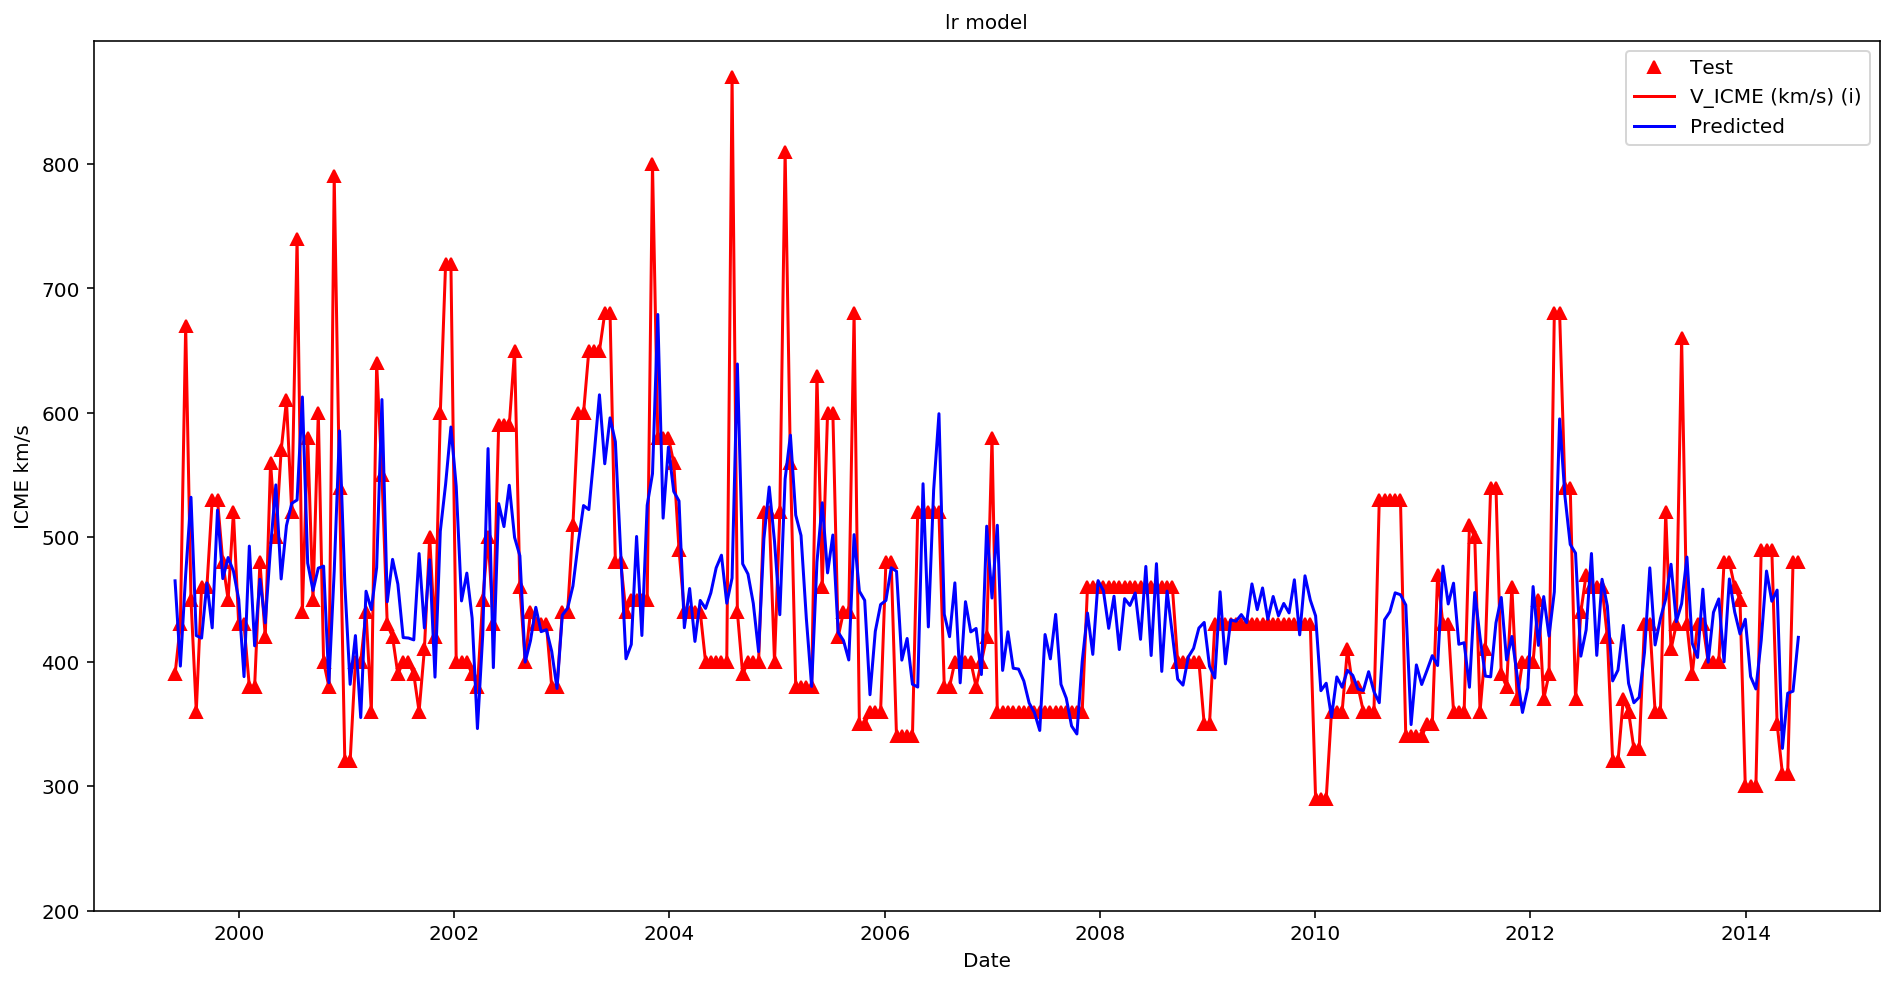

In [49]:
y_pred_train = lr.predict(X)

# get the index
yhat = pd.Series(y_pred_train)
yhat.index = trainy.index



plt.figure(figsize=(16,8))

# plt.plot(df[(347-past):348], 'r',label='history')
# plt.vlines(df[347:348].index,0, 700, colors='k', linestyles='dashed')

plt.plot(trainy, 'r^',label='Test')
plt.plot(trainy, 'r')
#     test.plot(kind='scatter')

plt.plot(yhat, color='blue',label='Predicted')
plt.title('lr model', fontsize=10)
plt.xlabel('Date', fontsize=10)
plt.ylabel('ICME km/s', fontsize=10)

plt.xticks(fontsize=10), plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.ylim(200,)

### r2_score

In [50]:
real_values = trainy
predited_values = yhat

coefficient_of_dermination = r2_score(real_values, predited_values)
coefficient_of_dermination

rs2 = round(coefficient_of_dermination,2)
print(rs2)

0.36


## MAE

In [51]:
mae = mean_absolute_error(real_values, predited_values)
mae = round(mae, 2)

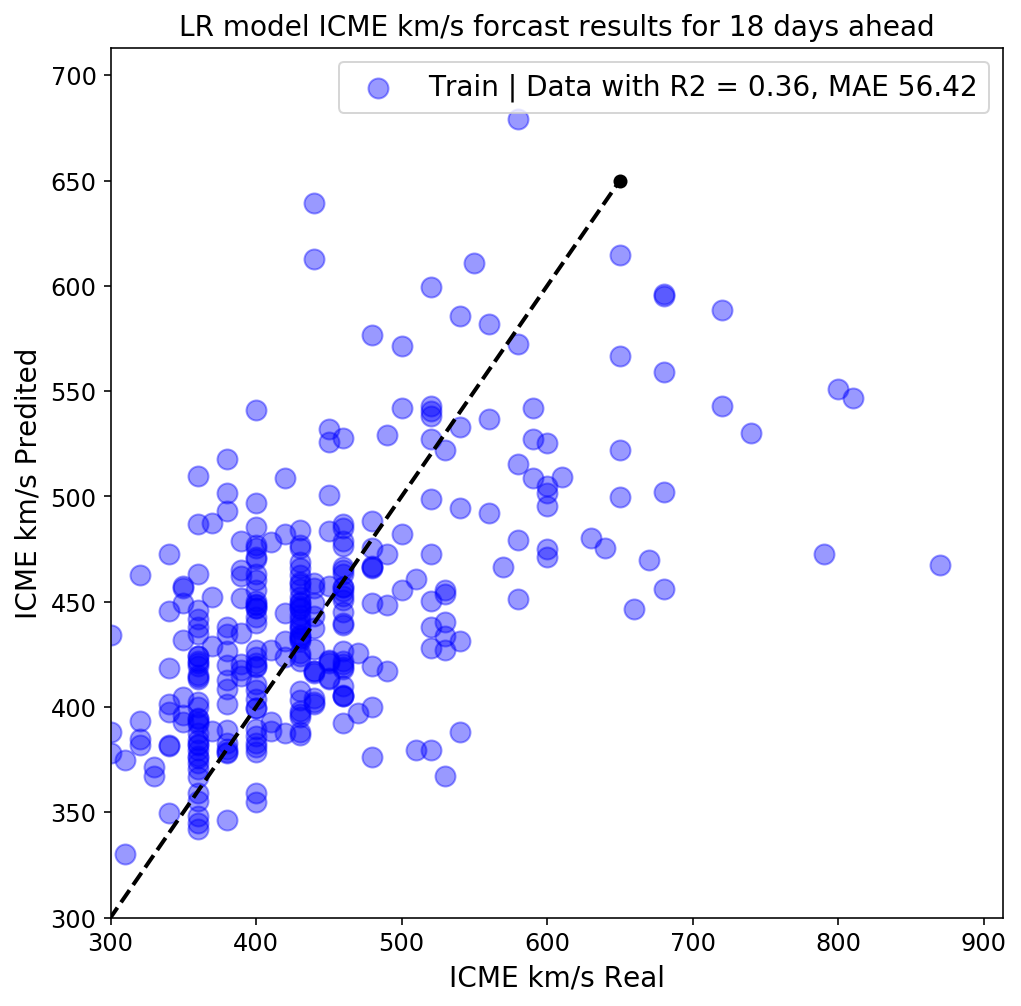

In [52]:
real_values = trainy
predited_values = yhat
lable = 'Train'
model_name = 'LR'

plott_real_data(real_values, predited_values, model_name, lable, rs2, mae)

## Predict LR on test

In [53]:
y_pred = lr.predict(X)

In [54]:
y_pred_test = lr.predict(testX)

In [55]:
# get the index
yhat = pd.Series(y_pred_test)
yhat.index = testy.index

(200, 656.5)

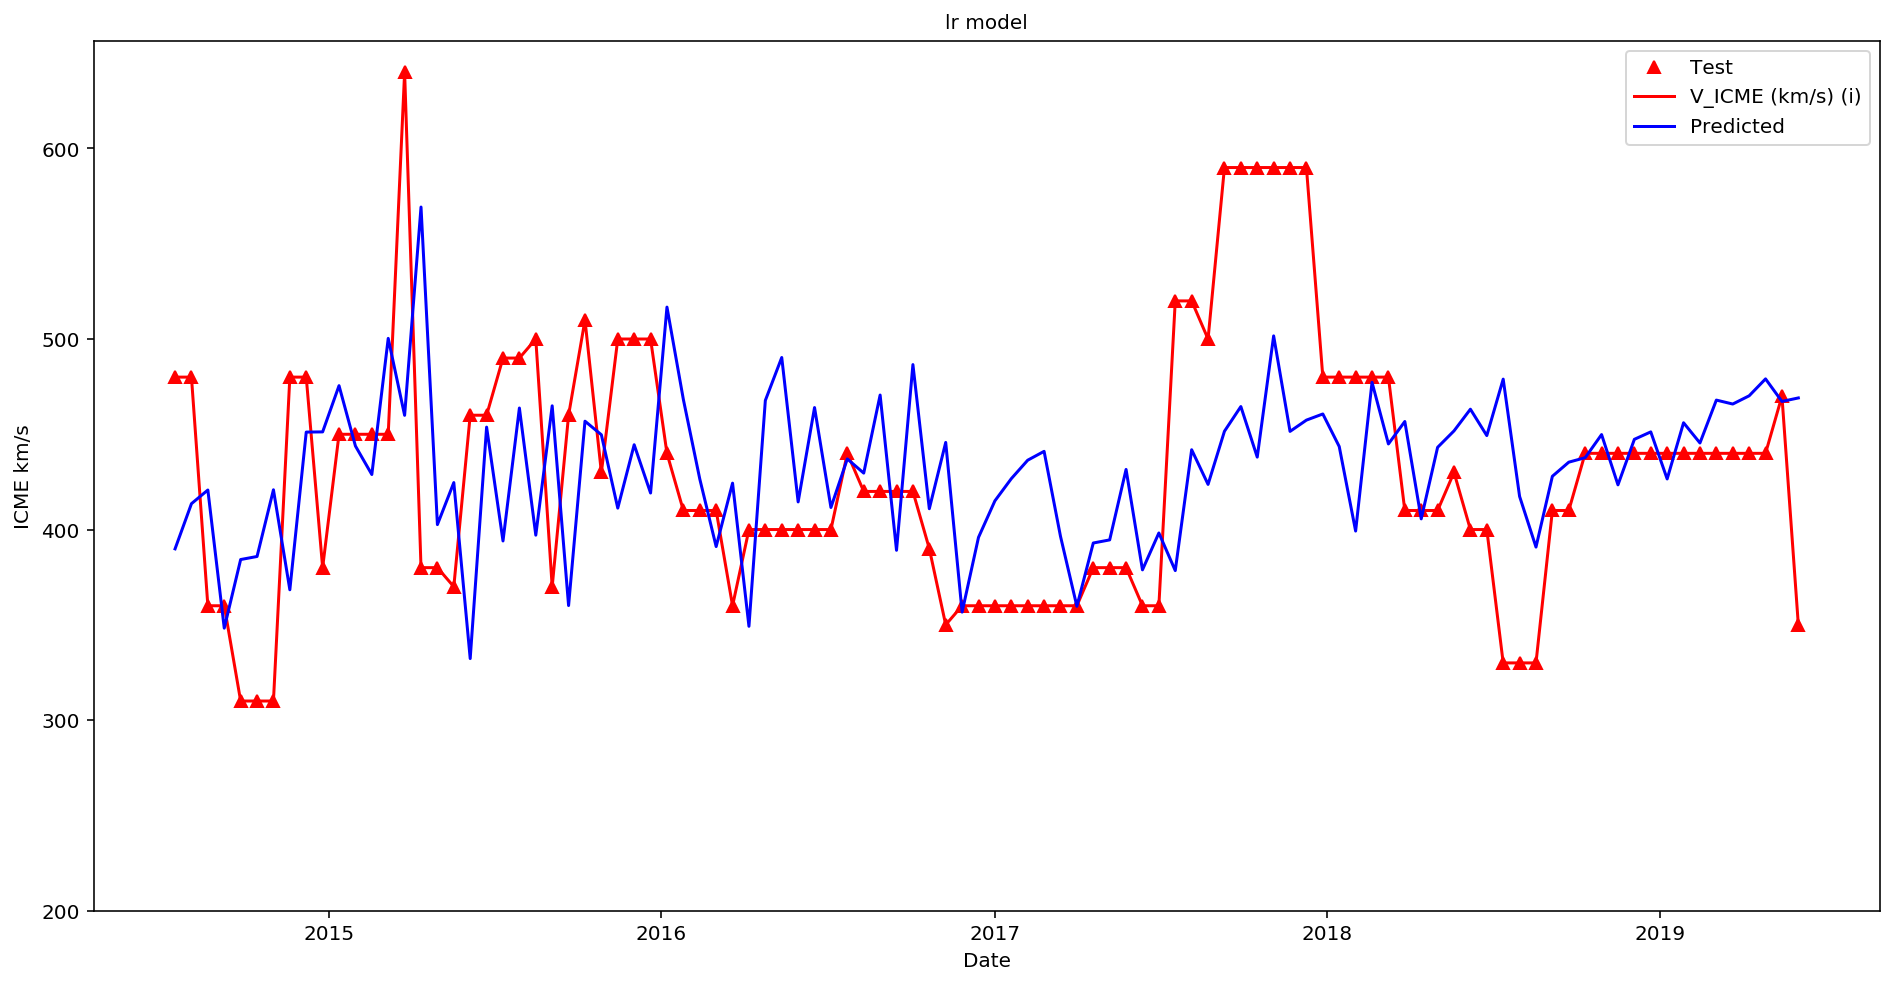

In [56]:
ahead = 100
past = 10

plt.figure(figsize=(16,8))

# plt.plot(df[(347-past):348], 'r',label='history')
# plt.vlines(df[347:348].index,0, 700, colors='k', linestyles='dashed')

plt.plot(testy[0:ahead], 'r^',label='Test')
plt.plot(testy[0:ahead], 'r')
#     test.plot(kind='scatter')

plt.plot(yhat[0:ahead], color='blue',label='Predicted')
plt.title('lr model', fontsize=10)
plt.xlabel('Date', fontsize=10)
plt.ylabel('ICME km/s', fontsize=10)

plt.xticks(fontsize=10), plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.ylim(200,)

### r2_score

In [57]:
real_values = testy
predited_values = y_pred_test

coefficient_of_dermination = r2_score(real_values, predited_values)
coefficient_of_dermination

rs2 = round(coefficient_of_dermination,2)
rs2

0.04

## MAE

In [58]:
mae = mean_absolute_error(real_values, predited_values)
mae = round(mae, 2)

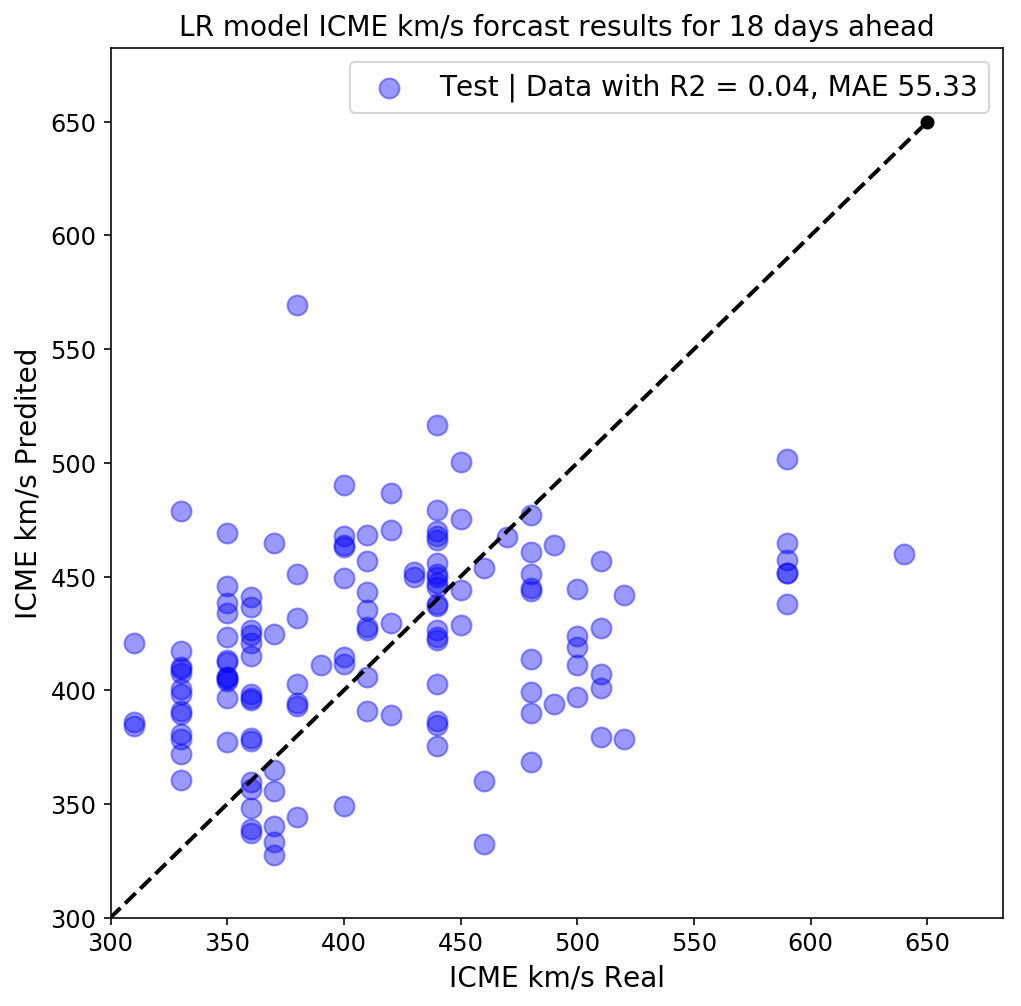

In [59]:
real_values = testy
predited_values = yhat
lable = 'Test'
model_name = 'LR'

plott_real_data(real_values, predited_values, model_name, lable, rs2, mae)

overfitting is observed

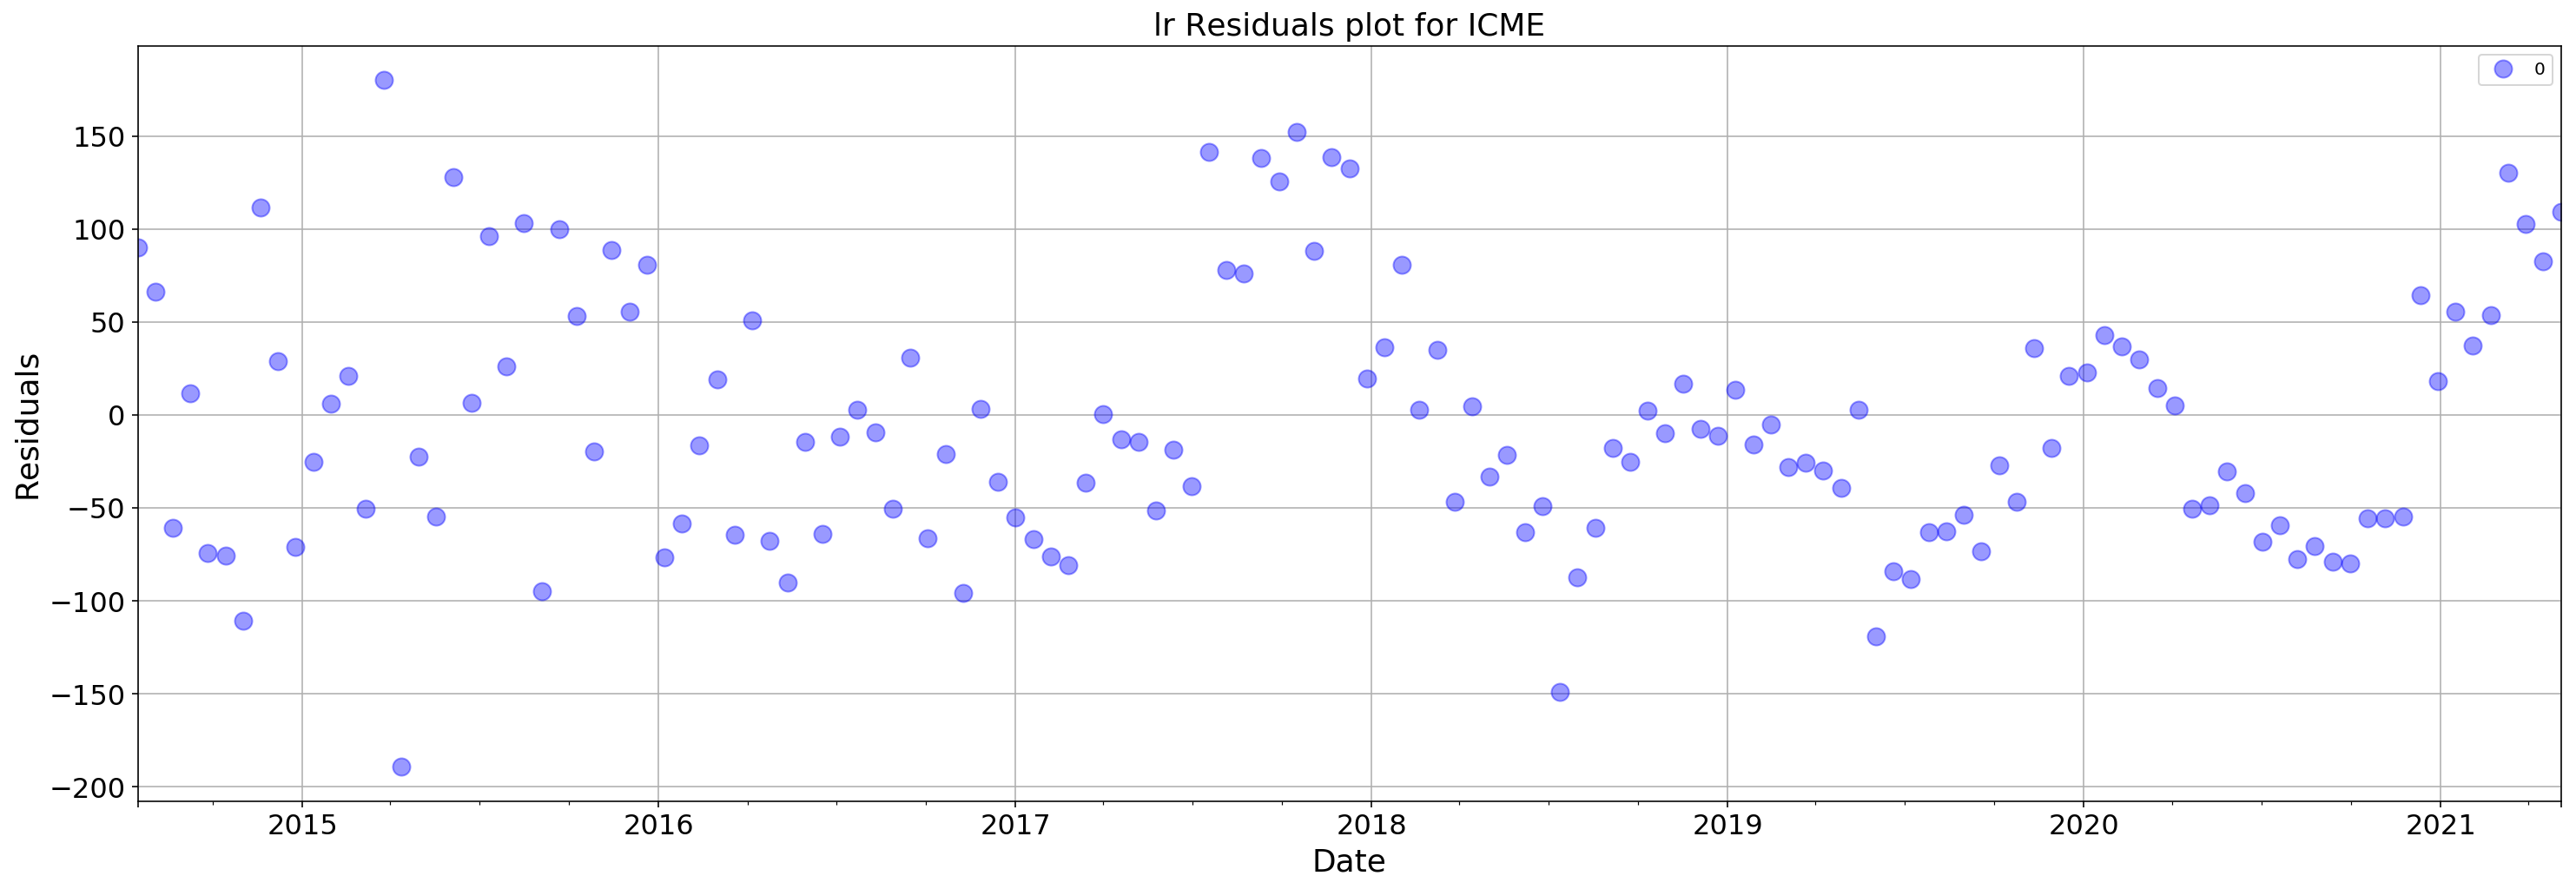

In [60]:
residuals = np.array(real_values) - np.array(predited_values)

residuals = pd.DataFrame(residuals)
residuals.index = testy.index
residuals.plot(kind='line', style='.',
                    figsize=(25,8), 
                    grid=True, 
                    ylabel="ICME km/s",
                    c='b', markersize=20, alpha=0.4)

# plt.hlines(0, 0, 1500, linestyles="--", color ='k')
# plt.xlim(0,)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Residuals", fontsize=18)
plt.title('lr Residuals plot for ICME', fontsize=18)
plt.xticks(fontsize=16), plt.yticks(fontsize=16)
plt.savefig("../Figures/" + section_fig_main_title + "lr18daysAhead_residu.png")

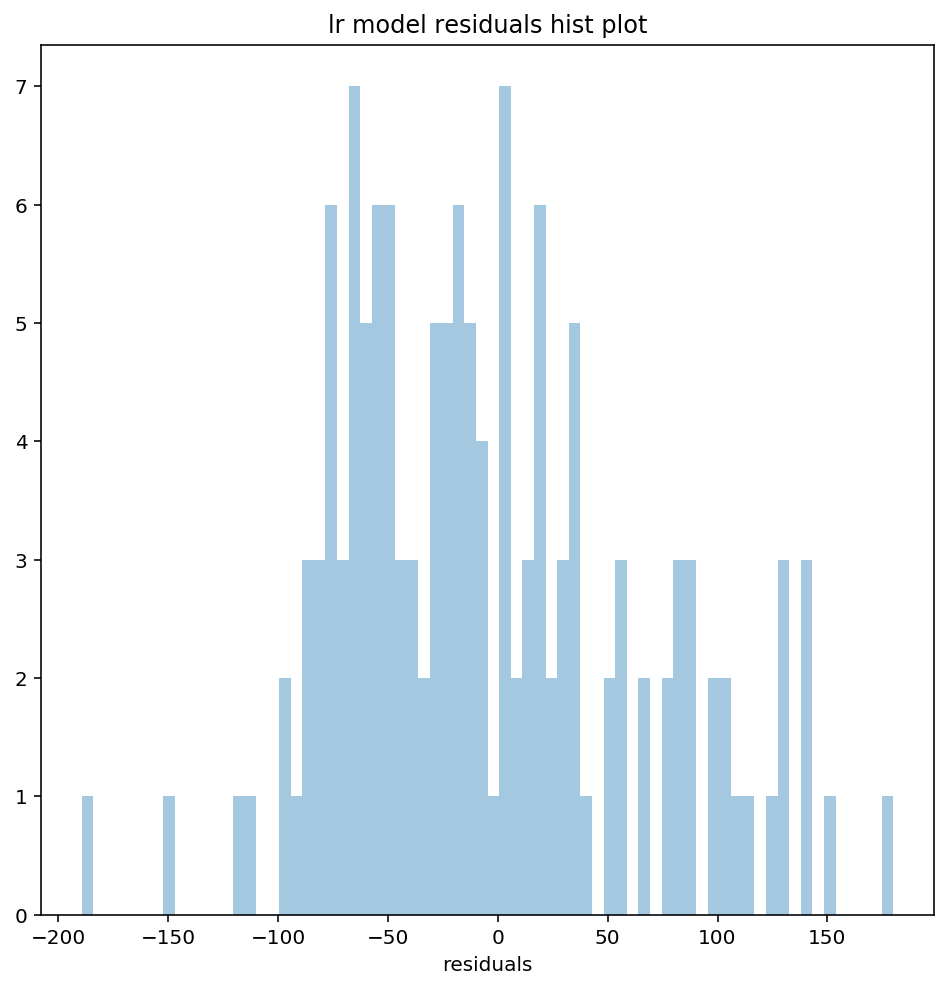

In [61]:
y = testy
y_pred = yhat
# Creat residuals
resids = y - y_pred
# N assumption:
plt.figure(figsize=(8,8))

plt.hist(resids, bins=70, alpha=0.4);
plt.xlabel("residuals")
# plt.ylabel("count")
plt.title("lr model residuals hist plot")
plt.savefig("../Figures/" + section_fig_main_title +"lr_residu_hist.png")

In general, overfitting was observed. I will try a multivariate - supervised approach.

## Sequential model



In [62]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [63]:
df_pd_shifted.head()

,V_ICME (km/s) (i),lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,...,lag51,lag52,lag53,lag54,lag55,lag56,lag57,lag58,lag59,lag60
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,,,,,,,,,,,,,,
1999-05-30,390.0,490.0,490.0,340.0,410.0,540.0,570.0,570.0,350.0,470.0,...,350.0,350.0,350.0,350.0,350.0,350.0,360.0,360.0,360.0,370.0
1999-06-17,430.0,390.0,490.0,490.0,340.0,410.0,540.0,570.0,570.0,350.0,...,350.0,350.0,350.0,350.0,350.0,350.0,350.0,360.0,360.0,360.0
1999-07-05,670.0,430.0,390.0,490.0,490.0,340.0,410.0,540.0,570.0,570.0,...,360.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,360.0,360.0
1999-07-23,450.0,670.0,430.0,390.0,490.0,490.0,340.0,410.0,540.0,570.0,...,450.0,360.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,360.0
1999-08-10,360.0,450.0,670.0,430.0,390.0,490.0,490.0,340.0,410.0,540.0,...,450.0,450.0,360.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0


scale, fix colname and index and make new pandas df

In [64]:
sc = MinMaxScaler(feature_range=(-1,1))
df_pd_shifted_scaled = sc.fit_transform(df_pd_shifted)


cols = df_pd_shifted.columns
indexx = df_pd_shifted.index
df_pd_shifted_scaled = pd.DataFrame(df_pd_shifted_scaled, columns=cols, index=indexx)
df_pd_shifted_scaled.head()

,V_ICME (km/s) (i),lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,...,lag51,lag52,lag53,lag54,lag55,lag56,lag57,lag58,lag59,lag60
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,,,,,,,,,,,,,,
1999-05-30,-0.655172,-0.310345,-0.310345,-0.827586,-0.586207,-0.137931,-0.034483,-0.034483,-0.793103,-0.379310,...,-0.793103,-0.793103,-0.793103,-0.793103,-0.793103,-0.793103,-0.758621,-0.758621,-0.758621,-0.724138
1999-06-17,-0.517241,-0.655172,-0.310345,-0.310345,-0.827586,-0.586207,-0.137931,-0.034483,-0.034483,-0.793103,...,-0.793103,-0.793103,-0.793103,-0.793103,-0.793103,-0.793103,-0.793103,-0.758621,-0.758621,-0.758621
1999-07-05,0.310345,-0.517241,-0.655172,-0.310345,-0.310345,-0.827586,-0.586207,-0.137931,-0.034483,-0.034483,...,-0.758621,-0.793103,-0.793103,-0.793103,-0.793103,-0.793103,-0.793103,-0.793103,-0.758621,-0.758621
1999-07-23,-0.448276,0.310345,-0.517241,-0.655172,-0.310345,-0.310345,-0.827586,-0.586207,-0.137931,-0.034483,...,-0.448276,-0.758621,-0.793103,-0.793103,-0.793103,-0.793103,-0.793103,-0.793103,-0.793103,-0.758621
1999-08-10,-0.758621,-0.448276,0.310345,-0.517241,-0.655172,-0.310345,-0.310345,-0.827586,-0.586207,-0.137931,...,-0.448276,-0.448276,-0.758621,-0.793103,-0.793103,-0.793103,-0.793103,-0.793103,-0.793103,-0.793103


In [65]:
# sc.inverse_transform(df_pd_shifted_scaled)

In [66]:
type(df_pd_shifted_scaled)

pandas.core.frame.DataFrame

## Train, test split

In [67]:
train_scaled, test_scaled = df_pd_shifted_scaled[0:num_train_rows] , df_pd_shifted_scaled[num_train_rows:]

In [68]:
trainX_scaled, trainy_scaled = train_scaled[train_scaled.drop(['V_ICME (km/s) (i)'], axis=1).columns], train_scaled['V_ICME (km/s) (i)']

testX_scaled, testy_scaled = test_scaled[test_scaled.drop(['V_ICME (km/s) (i)'], axis=1).columns], test_scaled['V_ICME (km/s) (i)']



## Model

In [69]:
model = keras.Sequential()

model.add(layers.Dense(10, activation="relu", kernel_initializer='normal', 
                       input_shape=(60,), name="layer1"))

model.add(layers.Dense(3, activation="relu", kernel_initializer='normal', 
                       input_shape=(10,), name="layer2"))

model.add(layers.Dense(1))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 10)                610       
_________________________________________________________________
layer2 (Dense)               (None, 3)                 33        
_________________________________________________________________
dense (Dense)                (None, 1)                 4         
Total params: 647
Trainable params: 647
Non-trainable params: 0
_________________________________________________________________


In [70]:
# Compile model
model.compile(loss='mean_squared_error', 
              optimizer='adam')

Instructions for updating:
Use tf.cast instead.


In [71]:
histroy = model.fit(trainX_scaled, trainy_scaled, epochs=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
307/307 [==============================] - 0s 1000us/sample - loss: 0.2752
Epoch 2/100
307/307 [==============================] - 0s 52us/sample - loss: 0.1926
Epoch 3/100
307/307 [==============================] - 0s 52us/sample - loss: 0.1295
Epoch 4/100
307/307 [==============================] - 0s 48us/sample - loss: 0.1048
Epoch 5/100
307/307 [==============================] - 0s 56us/sample - loss: 0.1041
Epoch 6/100
307/307 [==============================] - 0s 56us/sample - loss: 0.1020
Epoch 7/100
307/307 [==============================] - 0s 52us/sample - loss: 0.1014
Epoch 8/100
307/307 [==============================] - 0s 47us/sample - loss: 0.1005
Epoch 9/100
307/307 [==============================] - 0s 37us/sample - loss: 0.0994
Epoch 10/100
307/307 [==============================] - 0s 43us/sample - loss: 0.0988
Epoch 11/100
307/307 [==============================] - 0s 46us/sample - loss: 0.0977
Epoch 12/100


307/307 [==============================] - 0s 37us/sample - loss: 0.0432
Epoch 94/100
307/307 [==============================] - 0s 42us/sample - loss: 0.0410
Epoch 95/100
307/307 [==============================] - 0s 39us/sample - loss: 0.0396
Epoch 96/100
307/307 [==============================] - 0s 38us/sample - loss: 0.0397
Epoch 97/100
307/307 [==============================] - 0s 39us/sample - loss: 0.0402
Epoch 98/100
307/307 [==============================] - 0s 36us/sample - loss: 0.0386
Epoch 99/100
307/307 [==============================] - 0s 35us/sample - loss: 0.0382
Epoch 100/100
307/307 [==============================] - 0s 37us/sample - loss: 0.0403


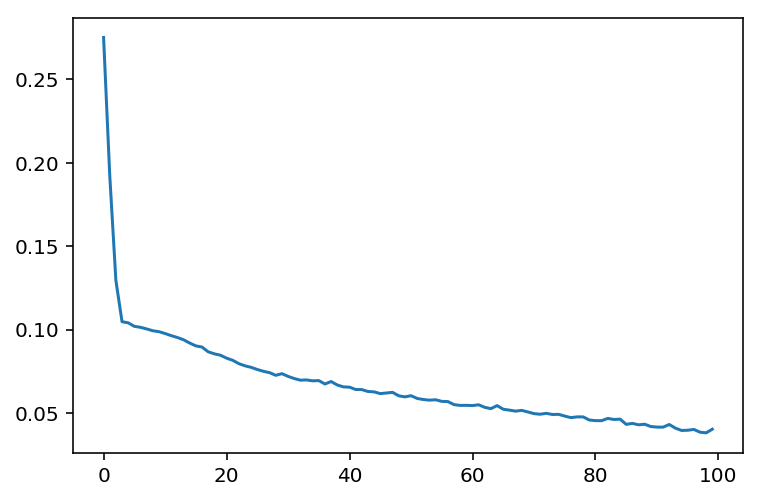

In [72]:
plt.plot(histroy.history['loss'])

## Checking out Model on Train data

In [73]:
predictions_scaled = model.predict(trainX_scaled)

merge predcitions_scaled with the trainX to make new df and then inverse transfer it

In [74]:
df_train_scaled = pd.DataFrame()
df_train_scaled = trainX_scaled
df_train_scaled['V_ICME (km/s) (i)'] = predictions_scaled

In [75]:
df_train_scaled.head()

,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,...,lag52,lag53,lag54,lag55,lag56,lag57,lag58,lag59,lag60,V_ICME (km/s) (i)
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,,,,,,,,,,,,,,
1999-05-30,-0.310345,-0.310345,-0.827586,-0.586207,-0.137931,-0.034483,-0.034483,-0.793103,-0.379310,-0.379310,...,-0.793103,-0.793103,-0.793103,-0.793103,-0.793103,-0.758621,-0.758621,-0.758621,-0.724138,-0.442032
1999-06-17,-0.655172,-0.310345,-0.310345,-0.827586,-0.586207,-0.137931,-0.034483,-0.034483,-0.793103,-0.379310,...,-0.793103,-0.793103,-0.793103,-0.793103,-0.793103,-0.793103,-0.758621,-0.758621,-0.758621,-0.592471
1999-07-05,-0.517241,-0.655172,-0.310345,-0.310345,-0.827586,-0.586207,-0.137931,-0.034483,-0.034483,-0.793103,...,-0.793103,-0.793103,-0.793103,-0.793103,-0.793103,-0.793103,-0.793103,-0.758621,-0.758621,-0.207331
1999-07-23,0.310345,-0.517241,-0.655172,-0.310345,-0.310345,-0.827586,-0.586207,-0.137931,-0.034483,-0.034483,...,-0.758621,-0.793103,-0.793103,-0.793103,-0.793103,-0.793103,-0.793103,-0.793103,-0.758621,-0.254535
1999-08-10,-0.448276,0.310345,-0.517241,-0.655172,-0.310345,-0.310345,-0.827586,-0.586207,-0.137931,-0.034483,...,-0.448276,-0.758621,-0.793103,-0.793103,-0.793103,-0.793103,-0.793103,-0.793103,-0.793103,-0.695314


In [76]:
df_train_unscaled_np = sc.inverse_transform(df_train_scaled)


cols = df_train_scaled.columns
indexx = df_train_scaled.index
df_pd_train_unscaled = pd.DataFrame(df_train_unscaled_np, columns=cols, index=indexx)
df_pd_train_unscaled.head()

,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,...,lag52,lag53,lag54,lag55,lag56,lag57,lag58,lag59,lag60,V_ICME (km/s) (i)
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,,,,,,,,,,,,,,
1999-05-30,490.0,490.0,340.0,410.0,540.0,570.0,570.0,350.0,470.0,470.0,...,350.0,350.0,350.0,350.0,350.0,360.0,360.0,360.0,370.0,451.810847
1999-06-17,390.0,490.0,490.0,340.0,410.0,540.0,570.0,570.0,350.0,470.0,...,350.0,350.0,350.0,350.0,350.0,350.0,360.0,360.0,360.0,408.183374
1999-07-05,430.0,390.0,490.0,490.0,340.0,410.0,540.0,570.0,570.0,350.0,...,350.0,350.0,350.0,350.0,350.0,350.0,350.0,360.0,360.0,519.873897
1999-07-23,670.0,430.0,390.0,490.0,490.0,340.0,410.0,540.0,570.0,570.0,...,360.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,360.0,506.184879
1999-08-10,450.0,670.0,430.0,390.0,490.0,490.0,340.0,410.0,540.0,570.0,...,450.0,360.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,378.358926


In [77]:
def plott_real_data_ann(real_values, predited_values, model_name, lable,rs2, mae):
    
    plt.figure(figsize=(8,8))

#     real_values = trainy
#     predited_values = yhat


    plt.scatter(real_values, predited_values, color='b', 
                alpha=0.4, label=f'{lable} | Data with R2 = {rs2}, MAE {mae}',s=100)
    plt.xlabel("ICME km/s Real", fontsize=14)
    plt.ylabel("ICME km/s Predited", fontsize=14)
    plt.xticks(fontsize=12), plt.yticks(fontsize=12)
#     plt.plot([0, 650], [0, 650], 'ko--', linewidth=2)
    # plt.hlines(0, -4, 4, linestyles="--", color ='k')
    # plt.vlines(0, -4, 4, linestyles="--", color ='k')

#     plt.xlim(-1.5,1), plt.ylim(-1.5,1)

    plt.title(f"{model_name} model ICME km/s forcast results for 18 days ahead", fontsize=14)

    # plt.tight_layout()
    plt.legend(fontsize=14)

    # plt.savefig("../Figures/" + section_fig_main_title + "XGBoost18daysAhead.png")

## rs2

In [78]:
real_values = trainy
predited_values = df_pd_train_unscaled['V_ICME (km/s) (i)']

coefficient_of_dermination = r2_score(real_values, predited_values)
coefficient_of_dermination

rs2 = round(coefficient_of_dermination,2)
rs2

0.66

## MAE

In [79]:
mae = mean_absolute_error(real_values, predited_values)
mae = round(mae, 2)

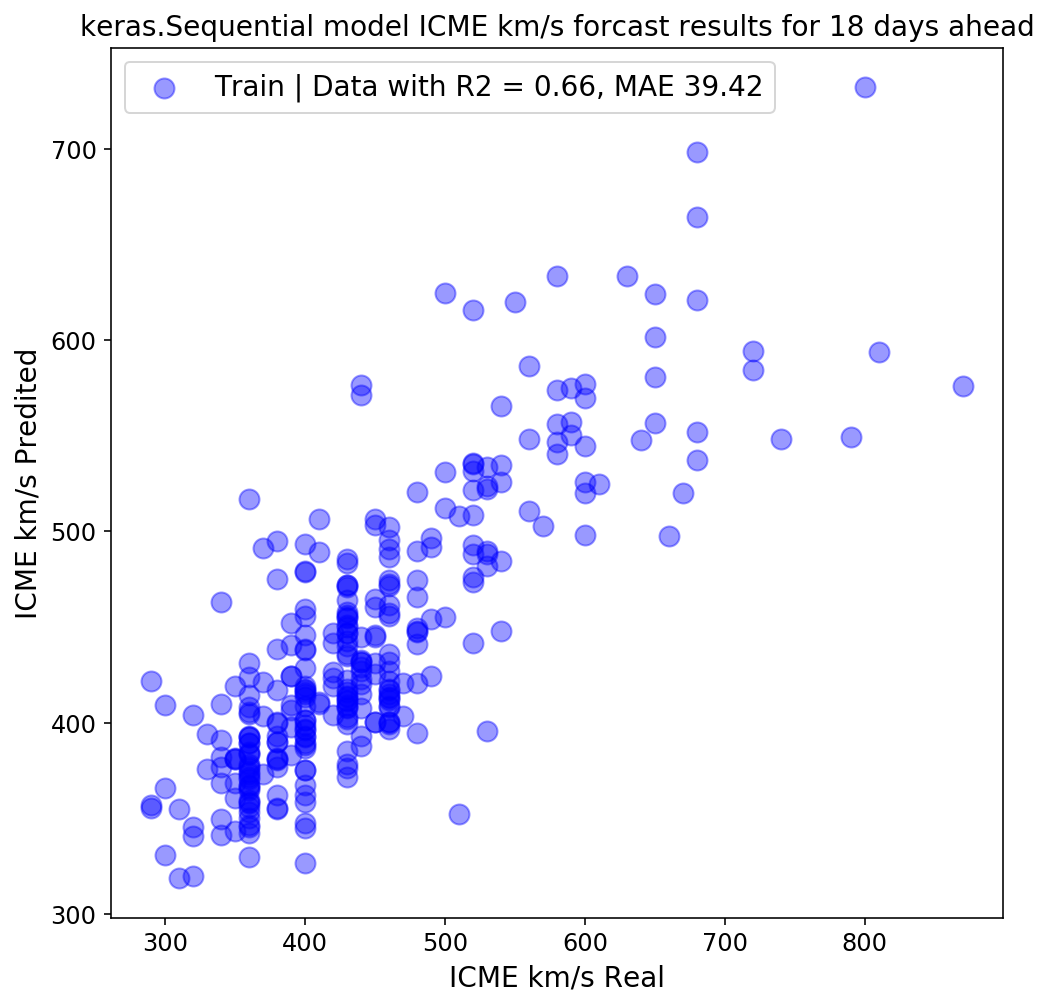

In [80]:
# plt.scatter(predcitions, testy)
real_values = trainy
predited_values = df_pd_train_unscaled['V_ICME (km/s) (i)']
lable = 'Train'
model_name = 'keras.Sequential'

plott_real_data_ann(real_values, predited_values, model_name, lable, rs2, mae)

## Checking out Model on Test data

In [81]:
predictions_scaled = model.predict(testX_scaled)

merge predcitions_scaled with the testX to make new df and then inverse transfer it

In [82]:
df_test_scaled = pd.DataFrame()
df_test_scaled = testX_scaled
df_test_scaled['V_ICME (km/s) (i)'] = predictions_scaled


In [83]:
df_test_scaled.head()

,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,...,lag52,lag53,lag54,lag55,lag56,lag57,lag58,lag59,lag60,V_ICME (km/s) (i)
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,,,,,,,,,,,,,,
2014-07-16,-0.344828,-0.344828,-0.931034,-0.931034,-0.793103,-0.310345,-0.310345,-0.310345,-0.965517,-0.965517,...,-0.620690,-0.620690,-0.724138,-0.413793,-0.689655,-0.655172,-0.137931,-0.137931,-0.586207,-0.765598
2014-08-03,-0.344828,-0.344828,-0.344828,-0.931034,-0.931034,-0.793103,-0.310345,-0.310345,-0.310345,-0.965517,...,-0.620690,-0.620690,-0.620690,-0.724138,-0.413793,-0.689655,-0.655172,-0.137931,-0.137931,-0.550005
2014-08-21,-0.344828,-0.344828,-0.344828,-0.344828,-0.931034,-0.931034,-0.793103,-0.310345,-0.310345,-0.310345,...,-0.448276,-0.620690,-0.620690,-0.620690,-0.724138,-0.413793,-0.689655,-0.655172,-0.137931,-0.448291
2014-09-08,-0.758621,-0.344828,-0.344828,-0.344828,-0.344828,-0.931034,-0.931034,-0.793103,-0.310345,-0.310345,...,-0.724138,-0.448276,-0.620690,-0.620690,-0.620690,-0.724138,-0.413793,-0.689655,-0.655172,-0.826319
2014-09-26,-0.758621,-0.758621,-0.344828,-0.344828,-0.344828,-0.344828,-0.931034,-0.931034,-0.793103,-0.310345,...,-0.655172,-0.724138,-0.448276,-0.620690,-0.620690,-0.620690,-0.724138,-0.413793,-0.689655,-0.799117


In [84]:
df_test_unscaled_np = sc.inverse_transform(df_test_scaled)


cols = df_test_scaled.columns
indexx = df_test_scaled.index
df_pd_test_unscaled = pd.DataFrame(df_test_unscaled_np, columns=cols, index=indexx)
df_pd_test_unscaled.head()

,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,...,lag52,lag53,lag54,lag55,lag56,lag57,lag58,lag59,lag60,V_ICME (km/s) (i)
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,,,,,,,,,,,,,,
2014-07-16,480.0,480.0,310.0,310.0,350.0,490.0,490.0,490.0,300.0,300.0,...,400.0,400.0,370.0,460.0,380.0,390.0,540.0,540.0,410.0,357.976580
2014-08-03,480.0,480.0,480.0,310.0,310.0,350.0,490.0,490.0,490.0,300.0,...,400.0,400.0,400.0,370.0,460.0,380.0,390.0,540.0,540.0,420.498510
2014-08-21,480.0,480.0,480.0,480.0,310.0,310.0,350.0,490.0,490.0,490.0,...,450.0,400.0,400.0,400.0,370.0,460.0,380.0,390.0,540.0,449.995540
2014-09-08,360.0,480.0,480.0,480.0,480.0,310.0,310.0,350.0,490.0,490.0,...,370.0,450.0,400.0,400.0,400.0,370.0,460.0,380.0,390.0,340.367582
2014-09-26,360.0,360.0,480.0,480.0,480.0,480.0,310.0,310.0,350.0,490.0,...,390.0,370.0,450.0,400.0,400.0,400.0,370.0,460.0,380.0,348.256131


## rs2

In [85]:
real_values = testy
predited_values = df_pd_test_unscaled['V_ICME (km/s) (i)']

coefficient_of_dermination = r2_score(real_values, predited_values)
coefficient_of_dermination

rs2 = round(coefficient_of_dermination,2)
rs2

0.15

## MAE

In [86]:
mae = mean_absolute_error(real_values, predited_values)
mae = round(mae, 2)

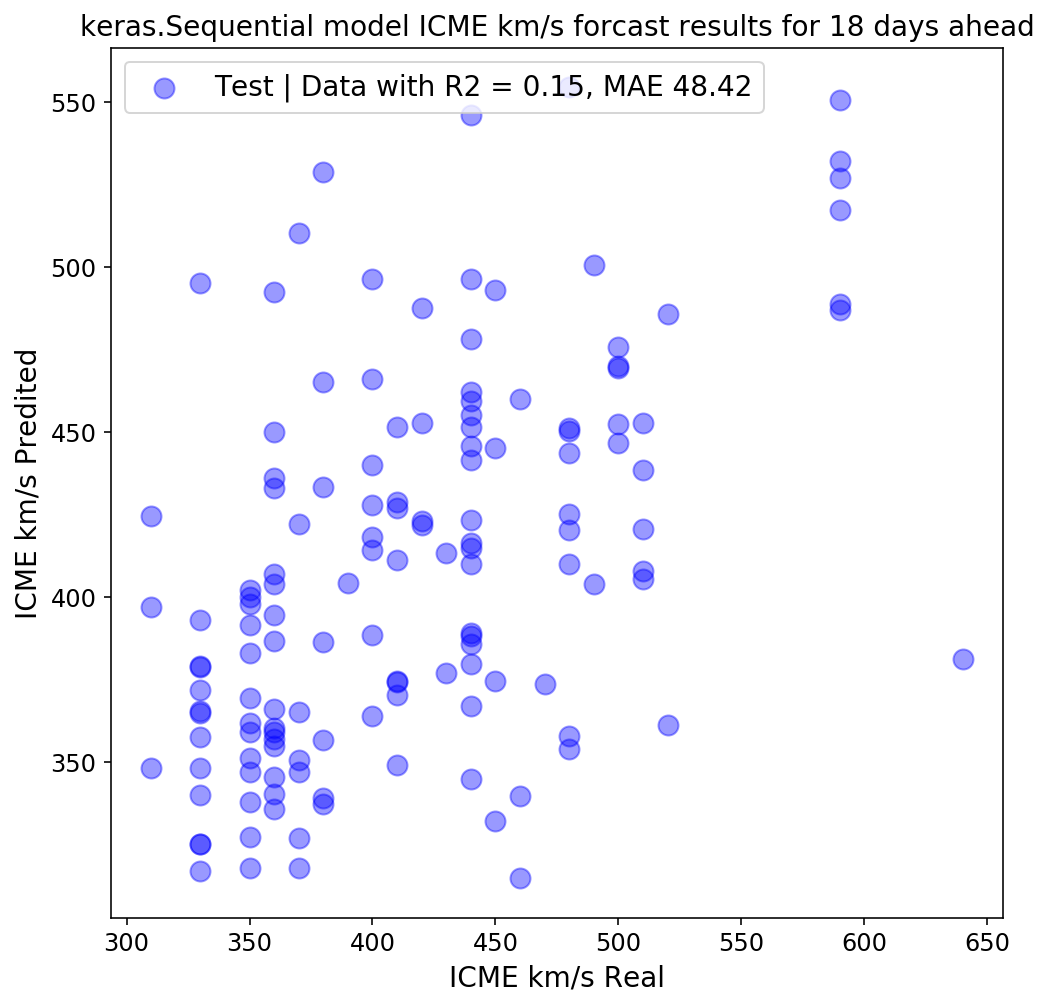

In [87]:
# plt.scatter(predcitions, testy)
real_values = testy
predited_values = df_pd_test_unscaled['V_ICME (km/s) (i)']
lable = 'Test'
model_name = 'keras.Sequential'

plott_real_data_ann(real_values, predited_values, model_name, lable, rs2, mae)

Applying the ML algorithms using supervised approach results in overfitting. I will try a multivariate approach.